### TFIDF Approach and manual feature engineering
(inspired by https://www.kaggle.com/code/tchen90/wordcloud-visulization-ada-boost-91-accuracy, but adapted)

In [1]:
! conda install numpy pandas matplotlib seaborn -y
! conda install nltk -y
! conda install scikit-learn -y

import numpy as np
import pandas as pd
import seaborn as sns

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [2]:
df = pd.read_csv('OnionOrNot.csv')
df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


## Analysis of Dataset

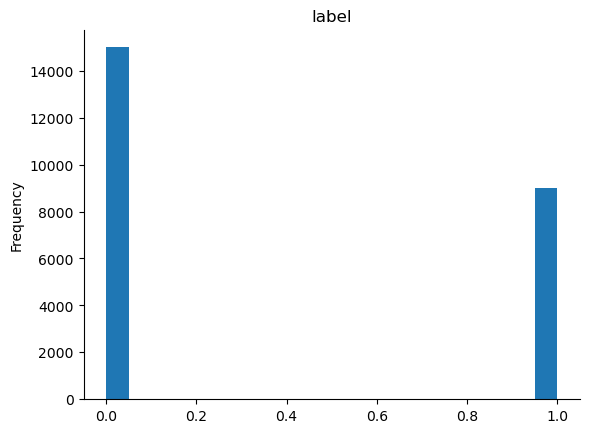

In [3]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
# share of onion and not-onion
df['label'].value_counts(normalize=True)*100

label
0    62.5
1    37.5
Name: proportion, dtype: float64

In [5]:
# word count
df['WordCount'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df.head()

,text,label,WordCount
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19
4,"For men looking for great single women, online...",1,23


In [6]:
# character count
df['CharCount'] = df['text'].str.len()
df.head()

,text,label,WordCount,CharCount
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14,66
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23,134
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19,101
4,"For men looking for great single women, online...",1,23,147


In [7]:
# stop words
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sem_data_proc_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['Stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14,66,3
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23,134,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19,101,0
4,"For men looking for great single women, online...",1,23,147,5


In [9]:
# remove stopwords
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61,0
1,Muslim Woman Denied Soda Can Fear She Could Us...,0,14,66,3
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23,134,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19,101,0
4,"For men looking great single women, online dat...",1,23,147,5


In [10]:
df['label'].value_counts()[0]

np.int64(15000)

In [11]:
# Sum of each column for each label
label_sums = df.groupby('label').sum()

# normalize values
label_sums['CharCount'][0] = label_sums['CharCount'][0]/df['label'].value_counts()[0]
label_sums['CharCount'][1] = label_sums['CharCount'][1]/df['label'].value_counts()[1]
label_sums['WordCount'][0] = label_sums['WordCount'][0]/df['label'].value_counts()[0]
label_sums['WordCount'][1] = label_sums['WordCount'][1]/df['label'].value_counts()[1]
label_sums['Stopwords'][0] = label_sums['Stopwords'][0]/df['label'].value_counts()[0]
label_sums['Stopwords'][1] = label_sums['Stopwords'][1]/df['label'].value_counts()[1]
label_sums

/tmp/ipykernel_528715/921605084.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  label_sums['CharCount'][0] = label_sums['CharCount'][0]/df['label'].value_counts()[0]
/tmp/ipykernel_528715/921605084.py:5: SettingWithCopyWarning: 
A value 

,text,WordCount,CharCount,Stopwords
label,,,,
0,Muslim Woman Denied Soda Can Fear She Could Us...,11.710000,71.694333,2.568
1,Entire Facebook Staff Laughs As Man Tightens P...,13.703778,83.260000,0.134


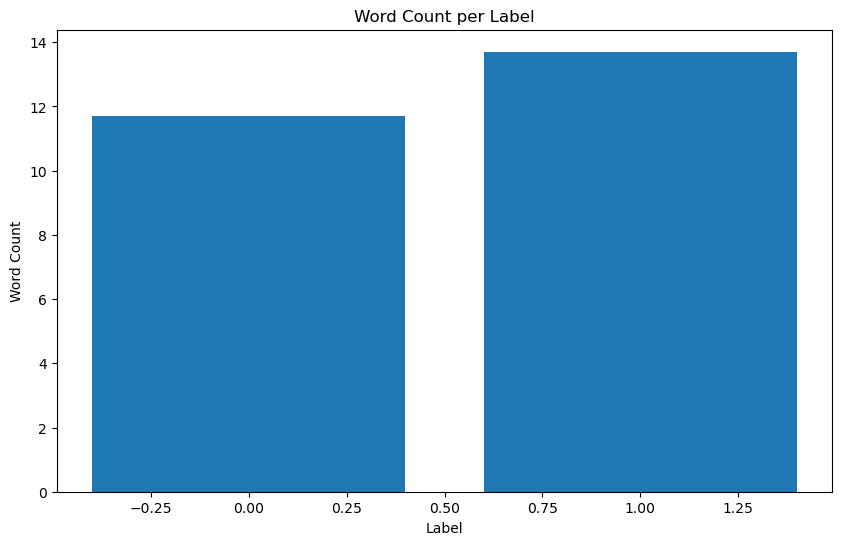

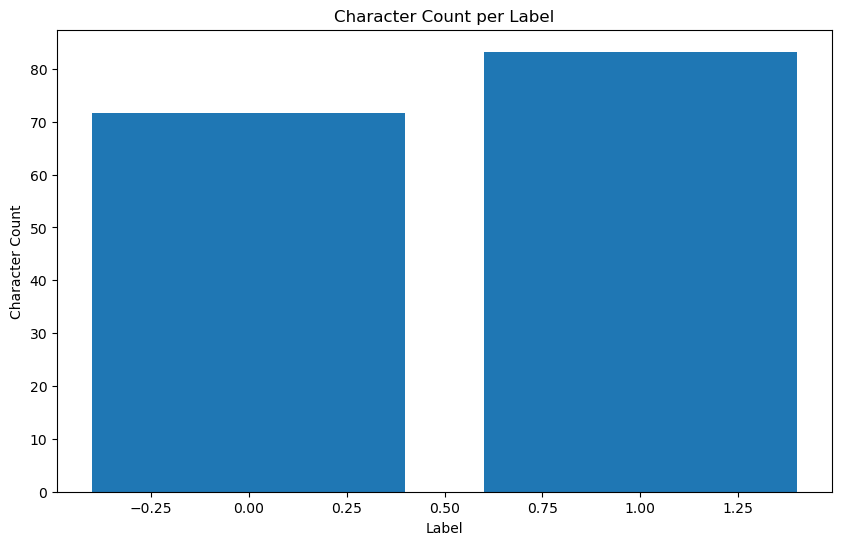

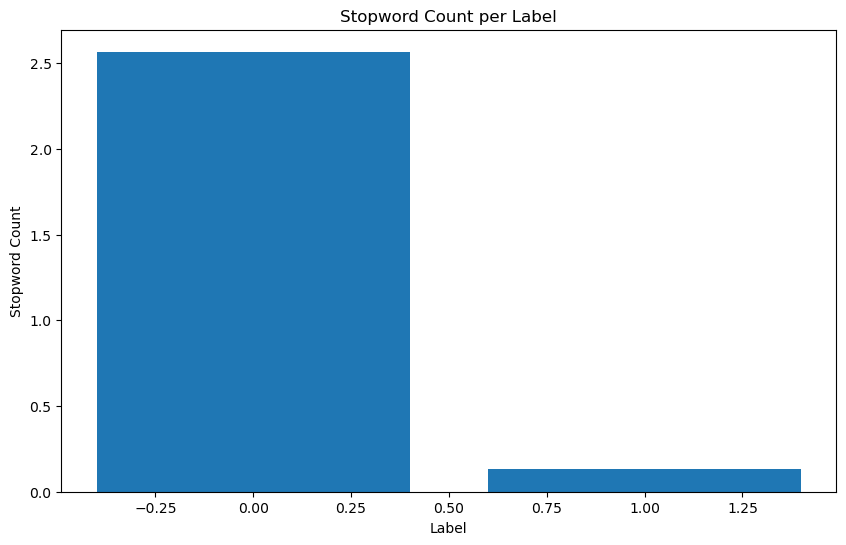

In [12]:
# compare wordcount, charcount and stopwords for onion and not-onion
import matplotlib.pyplot as plt
# Word Count Diagram
plt.figure(figsize=(10, 6))
plt.bar(label_sums.index, label_sums['WordCount'])
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.title('Word Count per Label')
plt.show()

# Character Count Diagram
plt.figure(figsize=(10, 6))
plt.bar(label_sums.index, label_sums['CharCount'])
plt.xlabel('Label')
plt.ylabel('Character Count')
plt.title('Character Count per Label')
plt.show()

# Stopwords Diagram
plt.figure(figsize=(10, 6))
plt.bar(label_sums.index, label_sums['Stopwords'])
plt.xlabel('Label')
plt.ylabel('Stopword Count')
plt.title('Stopword Count per Label')
plt.show()


Stopwords seem to be a distinct difference between onion and not-onion

<Figure size 2000x2000 with 0 Axes>

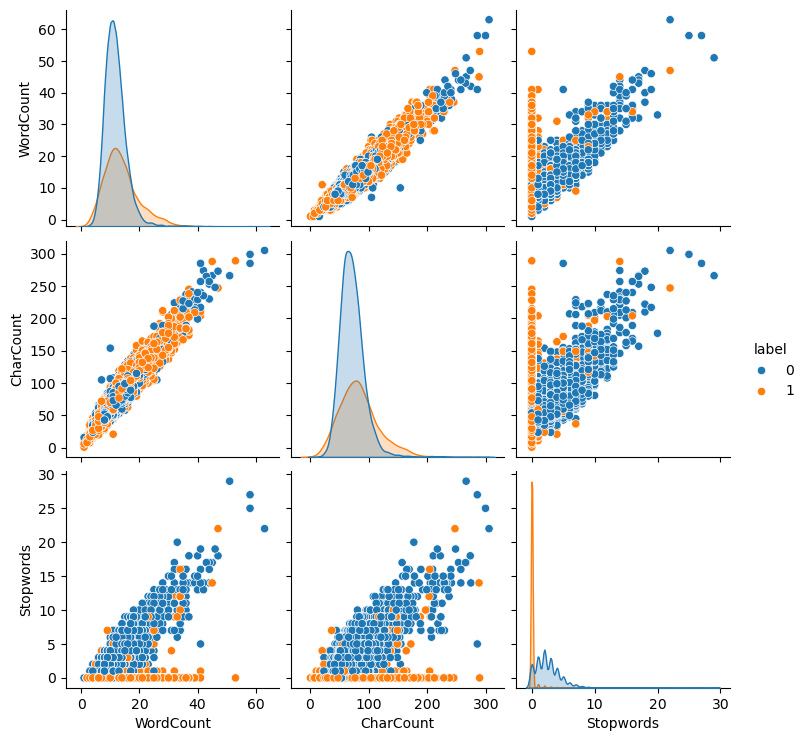

In [13]:
# visualize data
plt.figure(figsize=(20,20))
sns.pairplot(df, hue="label")
plt.show()

## TFIDF

In [14]:
# TFIDF for most frequent words
freq = pd.Series(' '.join(df['text']).split()).value_counts()[0:500]
freq = list(freq.index)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=len(freq), lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
df_vect = tfidf.fit_transform(df['text'])
text_df = pd.DataFrame(df_vect.toarray(), columns=tfidf.get_feature_names_out())

text_df.head()

,000,10,100,11,12,15,20,30,50,500,...,word,work,working,world,worth,wrong,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.472143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# concatinate TFIDF with the rest
text_df['WordCount'] = df['WordCount']
text_df['CharCount'] = df['CharCount']
text_df['Stopwords'] = df['Stopwords']
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Columns: 503 entries, 000 to Stopwords
dtypes: float64(500), int64(3)
memory usage: 92.1 MB


In [17]:
# prepare model training
X = text_df
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

## Random Forrest Classifier

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_rfc_pred))
print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test,y_rfc_pred))

Accuracy: 0.8985
[[2737  314]
 [ 173 1576]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3051
           1       0.83      0.90      0.87      1749

    accuracy                           0.90      4800
   macro avg       0.89      0.90      0.89      4800
weighted avg       0.90      0.90      0.90      4800

